# Approximation Error European Call option

## Description

This implementation compares the analytical value of a European call option via the Black-Scholes formula with the approximated value via standard Monte Carlo integration.

## Monte Carlo Integration

For a Monte Carlo Integration we need a probability density function $\phi : D \rightarrow \mathbb{R} , D \subset \mathbb{R}^{d} $ and a function $ f: D \rightarrow \mathbb{R}$ 

The goal of the Monte Carlo Integration is to find the expected value of given function f with respect to $\phi$ 

$$ \mathbb{E}_{\phi}[f] = \int_{D} f(x) \phi(x) dx $$

This can be done by the Monte Carlo Integrator. Herefore we take $ n \in \mathbb{N} $ inpendent and indentically distributed random vectors $X_{j}$ with distribution corresponding to $\phi$ and approximate the expected value with

$$ Y_m := \frac{1}{n} \sum_{j=1}^{n} f(X_j) \thickapprox \mathbb{E}[f] $$


## Implementation

In the following the Implementation is done.
First we have to import the necessary libraries.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Next the Parameters have to be defined. 


In [35]:
K = 100 # Strike price
S0 = 90 # Stock initial value
r = 0.02 # interest rate
sigma = 0.2 # Volatility
T = 10 # Maturity
Number_samples = 2**18
Number_batches = 100 

The payoff function has to be implemented. In our case the function $f$ is given by

$$\psi(x) = (S - K)^{+} $$



Text(0.5, 1.0, 'Payoff function of European Call option')

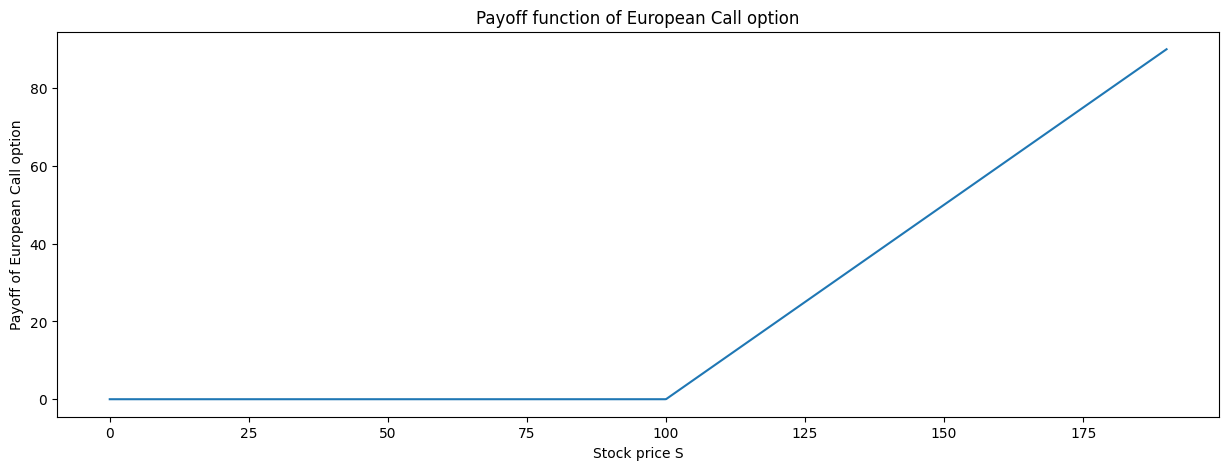

In [48]:
def payoff(x):
    return np.where(x-K < 0,0,x-K)

x = np.linspace(0,190, 1000)
plt.figure(figsize=(15,5))
plt.plot(x,payoff(x))
plt.xlabel("Stock price S")
plt.ylabel("Payoff of European Call option")
plt.title("Payoff function of European Call option")

Now the idea is to generate log-normal distributed samples. Herefore we first have to compute samples which are standard normal distributed and transform them into log-normal distributed samples. 

For the value $V(t_{*}, S_{*})$ of a European call option the following risk-neutral formula holds

$$V(t_{*}, S_{*}) = e^{-r(T-t_{*})} \mathbb{E}(\psi(S_{T})) $$

Hereby the $S_{T}$ follows the Brownian motion with drift $\mu = r$, volatility $\sigma$ and inital conditon $S_{t*} = S_{*}$.

Furthermore we know that $S_{T}$ is log-normal distributed with parameters
$$\xi = ln S_{*} + (\mu - \frac{\sigma^{2}}{2})(T-t_{*})$$

$$\beta^{2} = \sigma^{2} (T-t_{*})$$


Thus we draw samples $X_{1}, \dots , X_{n}$ from the log-normal distribution with given parameters.

(array([1.9770e+03, 1.4027e+04, 2.6185e+04, 3.1912e+04, 3.1236e+04,
        2.7868e+04, 2.3865e+04, 1.9740e+04, 1.6195e+04, 1.3013e+04,
        1.0432e+04, 8.5620e+03, 6.6770e+03, 5.3430e+03, 4.4250e+03,
        3.5450e+03, 2.9330e+03, 2.4110e+03, 1.9010e+03, 1.6320e+03,
        1.3270e+03, 1.0840e+03, 9.0300e+02, 7.0500e+02, 6.0600e+02,
        5.4200e+02, 4.6100e+02, 3.5000e+02, 3.2900e+02, 2.6300e+02,
        2.3500e+02, 1.7400e+02, 1.5900e+02, 1.4300e+02, 1.2400e+02,
        1.1200e+02, 8.1000e+01, 7.2000e+01, 8.5000e+01, 6.7000e+01,
        4.9000e+01, 4.0000e+01, 4.5000e+01, 3.8000e+01, 3.9000e+01,
        2.1000e+01, 2.2000e+01, 1.6000e+01, 2.2000e+01, 1.5000e+01,
        1.6000e+01, 5.0000e+00, 1.0000e+01, 5.0000e+00, 1.2000e+01,
        1.2000e+01, 7.0000e+00, 6.0000e+00, 7.0000e+00, 7.0000e+00,
        4.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

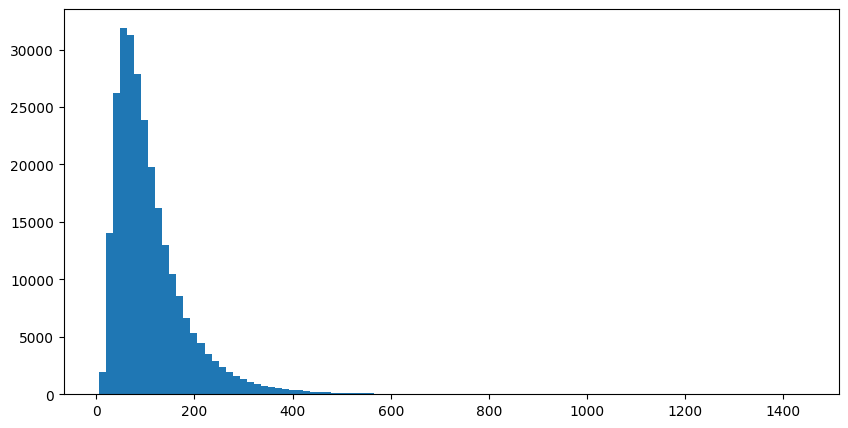

In [37]:
def Generate_log_normal_samples(Number_samples, Number_batches):
    Y = np.random.normal(size = (Number_batches, Number_samples))
    Xi = np.log(S0) + (r-0.5*sigma**2)*T
    beta = np.sqrt((sigma**2)*(T-0))
    X = np.exp(Xi + beta * Y)
    return X

X = Generate_log_normal_samples(Number_samples=Number_samples, Number_batches=Number_batches)

plt.figure(figsize=(10,5))
plt.hist(X[0,:], bins= 100)

The next step is to compute the Monte Carlo Integrator for th expected value of $\psi(S_{T})$

$$Y_{n} = \frac{1}{n} \sum_{i=1}^{m} \psi(X_{j}) \approx \mathbb{E}[\psi(S_{T})] $$

Finally we have to multiply with the discounting factor:

$$ V(t_{t*}, S_*) \thickapprox e^{-r(T-t_*)} Y_n

Text(0.5, 1.0, 'Approximation of European Call option value')

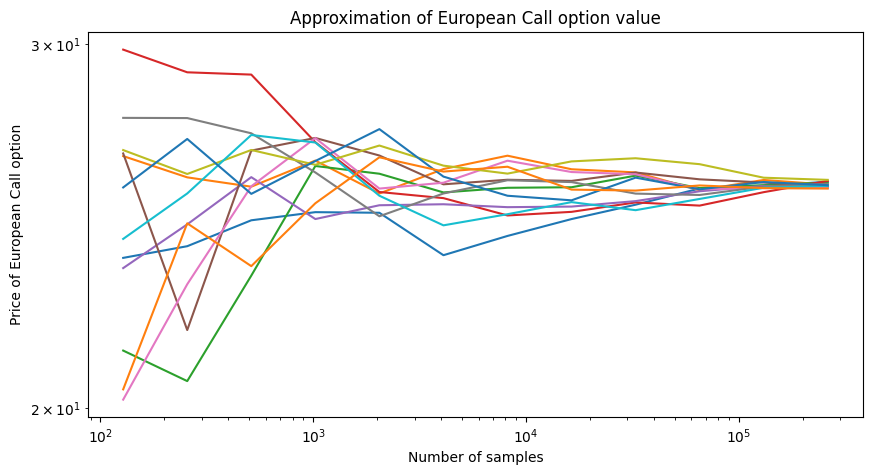

In [46]:
Exponents = np.linspace(7,18,12)
number_expon = len(Exponents)

Approx_MC = np.zeros((Number_batches,number_expon))


for j in range(Number_batches):
    payoffSum = np.cumsum(payoff(X[j,:]))

    for i in range(number_expon):
        m = 2**(int(Exponents[i]))
        Approx_MC[j,i] = 1/m * payoffSum[m-1]
        
Approx_MC = np.exp(-r*T) * Approx_MC

plt.figure(figsize=(10,5))
for k in range(number_expon):
    plt.loglog(2**Exponents, Approx_MC[k,:])
plt.xlabel("Number of samples")
plt.ylabel("Price of European Call option")
plt.title("Approximation of European Call option value")

Now we want to calculate the analytical price of a European call option. Herefore we can use the Black-Scholes formula for calls.

$$ V(t,S) = S \phi(d_1) - K e^{-r(T-t)}\phi(d_2) $$

with $\phi$ and $d_1, d_2$ respectively, is the unique solution of the Black-Scholes equation for European calls, i.e

$$ \partial_{t}V(t,S) + \frac{\sigma^{2}}{2}S^2\partial_{S}^{2}V(t,S) + r S \partial_S V(t,S) - r V(t,S) = 0 \qquad t \in [0,T], S > 0 $$
$$ V(T,S) = (S-K)^+

Text(0.5, 1.0, 'Error Approximation European Call Option')

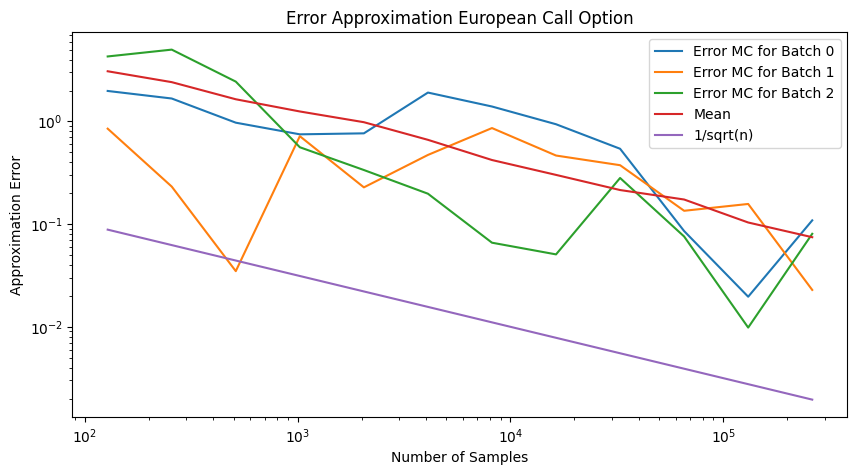

In [44]:
# Calculate the Error
d1 = (np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = (np.log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))

Price_Analytical = S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
True_Value = np.ones((Number_batches,number_expon))*Price_Analytical

# Calculate the error matrix for each method
Error_MC = np.abs(True_Value - Approx_MC)
Mean = 1/Number_batches * np.sum(Error_MC, axis=0)

x = 2**Exponents
plt.figure(figsize=(10,5))
for i in range(3):
    plt.loglog(x, Error_MC[i,:], label = f"Error MC for Batch {i}")
plt.loglog(x, Mean, label = "Mean")
plt.loglog(x, 1/np.sqrt(x), label = "1/sqrt(n)")
plt.legend()
plt.xlabel("Number of Samples")
plt.ylabel("Approximation Error")
plt.title("Error Approximation European Call Option")